# STOCK MARKET -IndRNN

### Problem Description
The problem we are going to look at in this post is the stock market prices prediction problem.

This is a problem where, given a day, month, and a year, the task is to predict the price of next days stocks . The data ranges from 1996 to 2010,  with 4836 observations.

** Name of the Dataset **  “TATAMOTORS.xlsx'“

In [6]:
import numpy
import pandas
import math

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import os


from keras.callbacks import ModelCheckpoint
from ind_rnn import IndRNNCell, RNN

In [7]:

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset sales-of-soaps.csv
dataframe = pandas.read_excel('TATAMOTORS.xlsx', usecols=[4])
#dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataframe.fillna(method='ffill', inplace=True)

dataframe.head()
#print(type(dataframe.dtypes))

dataset = dataframe.values      ##   convert the data-frame to its Numpy-array
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

forward_days = 10
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=40):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-forward_days+1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


# reshape into X=t and Y=t+1

#40 is the number of days to consider in prediction
look_back = 40

"""
Doing a Train-Test Split
Train: 67%
Test: 33%
"""

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX.shape

# reshape input to be [samples, time steps, features]

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))



3240 1596


In [8]:
batch_size = 40
num_classes = 10
epochs = 10     # 200  
hidden_units = 64  # 128

learning_rate = 1e-3

In [9]:
#from keras.models import load_model

# cells = [IndRNNCell(hidden_units), IndRNNCell(hidden_units)]
cells = [IndRNNCell(4), IndRNNCell(4)]

from ind_rnn import IndRNNCell, RNN
from ind_rnn import IndRNN
#model = load_model('my_model.h5',  custom_objects={'IndRNNCell': IndRNNCell, 'IndRNN': IndRNN})

In [10]:

print('Evaluate IRNN...')
from ind_rnn import IndRNNCell, RNN
from ind_rnn import IndRNN

# create the IndRNN network
model = Sequential()
model.add(RNN(cells, input_shape=(look_back, 1), return_sequences=True))
model.add(IndRNN(32, recurrent_clip_min=-1, recurrent_clip_max=-1, dropout=0.0, recurrent_dropout=0.0, return_sequences=True))
model.add(RNN(cells, return_sequences=True))
model.add(IndRNN(32, recurrent_clip_min=-1, recurrent_clip_max=-1, dropout=0.0, recurrent_dropout=0.0, return_sequences=True))
model.add(RNN(cells, return_sequences=False))
model.add(Dense(1))

from keras import optimizers
#optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)


model.compile(loss='mean_squared_error', optimizer= 'adam', metrics=['accuracy'])


'''
Return sequences
Return sequences refer to return the hidden state a<t>. By default, the return_sequences is set to False in Keras RNN layers, and this means the RNN layer will only return the last hidden state output a<T>. The last hidden state output captures an abstract representation of the input sequence. In some case, it is all we need, such as a classification or regression model where the RNN is followed by the Dense layer(s) to generate logits for news topic classification or score for sentiment analysis, or in a generative model to produce the softmax probabilities for the next possible char.

In other cases, we need the full sequence as the output. Setting return_sequences to True is necessary.
'''

Evaluate IRNN...


C:\Users\1864012\Documents\FINAL CODES GITHU\ind_rnn.py:143: UserWarning: IndRNNCell: Number of timesteps could not be determined. 
Defaulting to max clipping range of 1.0. 
If this model was trained using a specific timestep during training, inference may be wrong due to this default setting.
Please ensure that you use the same number of timesteps during training and evaluation
  warnings.warn("IndRNNCell: Number of timesteps could not be determined. \n"


'\nReturn sequences\nReturn sequences refer to return the hidden state a<t>. By default, the return_sequences is set to False in Keras RNN layers, and this means the RNN layer will only return the last hidden state output a<T>. The last hidden state output captures an abstract representation of the input sequence. In some case, it is all we need, such as a classification or regression model where the RNN is followed by the Dense layer(s) to generate logits for news topic classification or score for sentiment analysis, or in a generative model to produce the softmax probabilities for the next possible char.\n\nIn other cases, we need the full sequence as the output. Setting return_sequences to True is necessary.\n'

In [11]:
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_1 (RNN)                  (None, 40, 4)             356       
_________________________________________________________________
ind_rnn_1 (IndRNN)           (None, 40, 32)            192       
_________________________________________________________________
rnn_2 (RNN)                  (None, 40, 4)             356       
_________________________________________________________________
ind_rnn_2 (IndRNN)           (None, 40, 32)            192       
_________________________________________________________________
rnn_3 (RNN)                  (None, 4)                 356       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 745
Trainable params: 745
Non-trainable params: 0
________________________________________________________

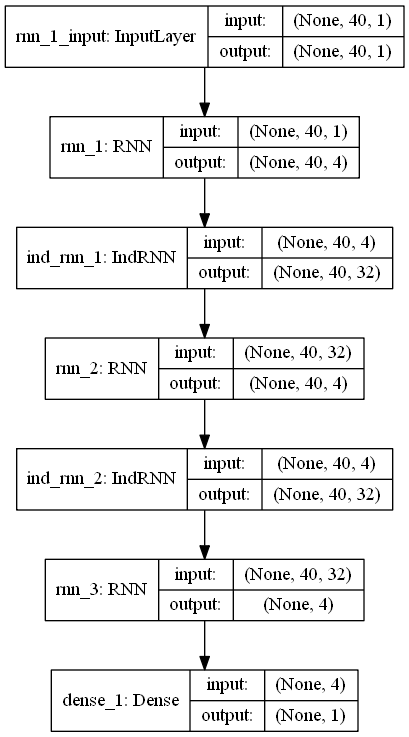

In [12]:
#!pip install GraphViz 
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
%%time
# Fit the LSTM network
model.fit(trainX, trainY, epochs=200, batch_size=40, verbose=2)

Epoch 1/20
 - 11s - loss: 0.0019 - accuracy: 3.1338e-04
Epoch 2/20
 - 4s - loss: 2.8792e-04 - accuracy: 3.1338e-04
Epoch 3/20
 - 5s - loss: 2.5837e-04 - accuracy: 3.1338e-04
Epoch 4/20
 - 4s - loss: 2.5827e-04 - accuracy: 3.1338e-04
Epoch 5/20
 - 5s - loss: 2.7082e-04 - accuracy: 3.1338e-04
Epoch 6/20
 - 5s - loss: 2.4124e-04 - accuracy: 3.1338e-04
Epoch 7/20
 - 5s - loss: 2.9022e-04 - accuracy: 3.1338e-04
Epoch 8/20
 - 5s - loss: 2.2021e-04 - accuracy: 3.1338e-04
Epoch 9/20
 - 5s - loss: 2.1004e-04 - accuracy: 3.1338e-04
Epoch 10/20
 - 5s - loss: 2.0819e-04 - accuracy: 3.1338e-04
Epoch 11/20
 - 4s - loss: 1.9489e-04 - accuracy: 3.1338e-04
Epoch 12/20
 - 4s - loss: 2.0598e-04 - accuracy: 3.1338e-04
Epoch 13/20
 - 4s - loss: 1.6609e-04 - accuracy: 3.1338e-04
Epoch 14/20
 - 5s - loss: 1.5901e-04 - accuracy: 3.1338e-04
Epoch 15/20
 - 5s - loss: 1.7154e-04 - accuracy: 3.1338e-04
Epoch 16/20
 - 4s - loss: 1.6299e-04 - accuracy: 3.1338e-04
Epoch 17/20
 - 5s - loss: 1.4170e-04 - accuracy: 3.1

Once the model is fit, we can estimate the performance of the model on the train and test datasets.

In [14]:
scores = model.evaluate(trainX, trainY, verbose=0)


In [15]:
from keras.models import load_model

print(scores)
print(model.metrics_names)

[9.993236669759444e-05, 0.0003133813734166324]
['loss', 'accuracy']


In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

***Note that we invert the predictions before calculating error scores 
to ensure that performance is reported in the same units as the original data (stock prices).***

In [17]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [18]:
# calculate root mean squared error
trainScore = mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore))

Train Score: 34.48 MSE
Test Score: 5586.43 MSE


## MSE for IndRNN when it is trained with 200 epochs was 46
## Mean Squared Error (MSE) = 46

Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the training dataset in green, and the predictions on the unseen test dataset in black.

C:\Users\1864012\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


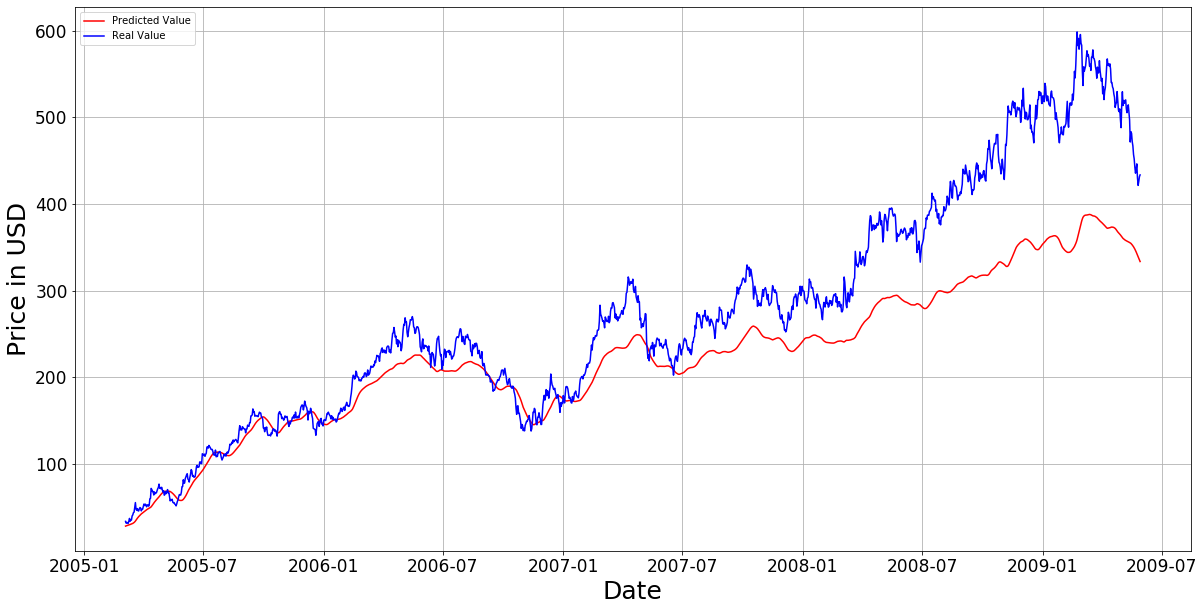

In [22]:
datedate = pandas.read_excel('TATAMOTORS.xlsx', usecols=[0], skipfooter=3)

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(datedate.tail(1547),testPredict, label='Predicted Value', color='red')
plt.plot(datedate.tail(1547),testY[0], label='Real Value', color='blue')
plt.xlabel('Date', fontsize=25)
plt.ylabel('Price in USD', fontsize=25)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend()

plt.show()